In [1]:
# Import all relevant libraries
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/CDSAML_P13/NY.csv")
df

,Health Service Area,Hospital County,Operating Certificate Number,Facility Id,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,Ethnicity,...,APR Risk of Mortality,APR Medical Surgical Description,Payment Typology 1,Payment Typology 2,Payment Typology 3,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5333.90,4818.42
1,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,NaN,NaN,0,N,Y,4865.99,4588.78
2,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,Private Health Insurance,NaN,0,N,Y,5901.54,5559.56
3,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,50 to 69,147,F,White,Not Span/Hispanic,...,Minor,Medical,Medicare,NaN,NaN,0,N,Y,3619.08,3567.25
4,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,70 or Older,147,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Blue Cross/Blue Shield,Private Health Insurance,0,N,Y,3185.87,3167.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Private Health Insurance,0,N,Y,43494.00,5588.26
2346927,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,50 to 69,117,M,White,Not Span/Hispanic,...,Minor,Medical,Private Health Insurance,NaN,NaN,0,N,Y,16662.00,2907.62
2346928,NaN,NaN,NaN,NaN,Redacted for Confidentiality,50 to 69,NaN,M,White,Unknown,...,Minor,Medical,Medicaid,NaN,NaN,0,N,N,7142.00,1692.55
2346929,Long Island,Suffolk,5157003.0,943.0,St Catherine of Siena Hospital,70 or Older,117,M,White,Not Span/Hispanic,...,Moderate,Medical,Medicare,Medicare,Blue Cross/Blue Shield,0,N,Y,13070.00,2447.75


In [4]:
df.isnull().sum()

Health Service Area                       5464
Hospital County                           5464
Operating Certificate Number              5464
Facility Id                               5464
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                      35816
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                          0
Discharge Year                               0
CCS Diagnosis Code                           0
CCS Diagnosis Description                    0
CCS Procedure Code                           0
CCS Procedure Description                    0
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code                                 0
APR MDC Descr

In [5]:
df['Length of Stay']

0          4
1          4
2          4
3          2
4          2
          ..
2346926    2
2346927    1
2346928    2
2346929    1
2346930    1
Name: Length of Stay, Length: 2346931, dtype: object

In [6]:
df = df.dropna(subset=['Length of Stay'])

In [7]:
df['Length of Stay'].isnull().sum()

0

In [8]:
df['Length of Stay'] = df['Length of Stay'].apply(lambda x: str(x).split(' ')[0])
df['Length of Stay'] = pd.to_numeric(df['Length of Stay'])

In [9]:
df['Length of Stay'].mean()

5.476420908837968

In [10]:
df.dtypes

Health Service Area                     object
Hospital County                         object
Operating Certificate Number           float64
Facility Id                            float64
Facility Name                           object
Age Group                               object
Zip Code - 3 digits                     object
Gender                                  object
Race                                    object
Ethnicity                               object
Length of Stay                           int64
Type of Admission                       object
Patient Disposition                     object
Discharge Year                           int64
CCS Diagnosis Code                       int64
CCS Diagnosis Description               object
CCS Procedure Code                       int64
CCS Procedure Description               object
APR DRG Code                             int64
APR DRG Description                     object
APR MDC Code                             int64
APR MDC Descr

In [11]:
df = df.drop(["Facility Id", "Total Charges", "Total Costs", "Health Service Area", "Hospital County","Zip Code - 3 digits", "Race", "Ethnicity", "Patient Disposition", "Birth Weight", "Payment Typology 3", "Payment Typology 2", "Operating Certificate Number","Facility Name", "Gender", "CCS Diagnosis Description", "CCS Procedure Description", "APR DRG Description", "APR MDC Description", "APR Severity of Illness Description", "APR Medical Surgical Description", "Abortion Edit Indicator", "Discharge Year"], axis = 1)

In [12]:
df.isna().sum()

Age Group                           0
Length of Stay                      0
Type of Admission                   0
CCS Diagnosis Code                  0
CCS Procedure Code                  0
APR DRG Code                        0
APR MDC Code                        0
APR Severity of Illness Code        0
APR Risk of Mortality             111
Payment Typology 1                  0
Emergency Department Indicator      0
dtype: int64

In [13]:
df.dtypes

Age Group                         object
Length of Stay                     int64
Type of Admission                 object
CCS Diagnosis Code                 int64
CCS Procedure Code                 int64
APR DRG Code                       int64
APR MDC Code                       int64
APR Severity of Illness Code       int64
APR Risk of Mortality             object
Payment Typology 1                object
Emergency Department Indicator    object
dtype: object

In [14]:
df = df.dropna(subset=['APR Risk of Mortality'])

In [15]:
mort_string_index = {'Minor': 1, 'Moderate': 2, 'Major': 3, 'Extreme': 4}
age_string_index = {'0 to 17': 1, '18 to 29': 2, '30 to 49': 3, '50 to 69': 4, '70 or Older': 5}

df['Age Group'] = df['Age Group'].apply(lambda x: age_string_index[x])
df['APR Risk of Mortality'] = df['APR Risk of Mortality'].apply(lambda x: mort_string_index[x])
df.head()

,Age Group,Length of Stay,Type of Admission,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Payment Typology 1,Emergency Department Indicator
0,5,4,Urgent,122,0,139,4,2,1,Medicare,Y
1,5,4,Elective,55,0,422,10,2,2,Medicare,Y
2,5,4,Urgent,122,202,139,4,1,1,Medicare,Y
3,4,2,Elective,55,0,249,6,2,1,Medicare,Y
4,5,2,Elective,122,0,139,4,1,2,Medicare,Y


In [16]:
one_hot_encoded_df = pd.get_dummies(df)

In [17]:
one_hot_encoded_df.head()

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Federal/State/Local/VA,"Payment Typology 1_Managed Care, Unspecified",Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y
0,5,4,122,0,139,4,2,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,5,4,55,0,422,10,2,2,1,0,...,0,0,0,1,0,0,0,0,0,1
2,5,4,122,202,139,4,1,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,4,2,55,0,249,6,2,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,5,2,122,0,139,4,1,2,1,0,...,0,0,0,1,0,0,0,0,0,1


In [18]:
one_hot_encoded_df.dtypes

Age Group                                       int64
Length of Stay                                  int64
CCS Diagnosis Code                              int64
CCS Procedure Code                              int64
APR DRG Code                                    int64
APR MDC Code                                    int64
APR Severity of Illness Code                    int64
APR Risk of Mortality                           int64
Type of Admission_Elective                      uint8
Type of Admission_Emergency                     uint8
Type of Admission_Newborn                       uint8
Type of Admission_Not Available                 uint8
Type of Admission_Trauma                        uint8
Type of Admission_Urgent                        uint8
Payment Typology 1_Blue Cross/Blue Shield       uint8
Payment Typology 1_Department of Corrections    uint8
Payment Typology 1_Federal/State/Local/VA       uint8
Payment Typology 1_Managed Care, Unspecified    uint8
Payment Typology 1_Medicaid 

In [19]:
bins = [0,6,12,30,120]
labels = [6,12,30,120]
one_hot_encoded_df['stay_bin'] = pd.cut(x = one_hot_encoded_df['Length of Stay'], bins = bins)
one_hot_encoded_df['stay_label'] = pd.cut(x = one_hot_encoded_df['Length of Stay'], bins = bins, labels = labels)
one_hot_encoded_df['stay_bin'] = one_hot_encoded_df['stay_bin'].apply(lambda x: str(x).replace(',',' -'))
one_hot_encoded_df['stay_bin'] = one_hot_encoded_df['stay_bin'].apply(lambda x: str(x).replace('120','120+'))
one_hot_encoded_df

,Age Group,Length of Stay,CCS Diagnosis Code,CCS Procedure Code,APR DRG Code,APR MDC Code,APR Severity of Illness Code,APR Risk of Mortality,Type of Admission_Elective,Type of Admission_Emergency,...,Payment Typology 1_Medicaid,Payment Typology 1_Medicare,Payment Typology 1_Miscellaneous/Other,Payment Typology 1_Private Health Insurance,Payment Typology 1_Self-Pay,Payment Typology 1_Unknown,Emergency Department Indicator_N,Emergency Department Indicator_Y,stay_bin,stay_label
0,5,4,122,0,139,4,2,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
1,5,4,55,0,422,10,2,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
2,5,4,122,202,139,4,1,1,0,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
3,4,2,55,0,249,6,2,1,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
4,5,2,122,0,139,4,1,2,1,0,...,0,1,0,0,0,0,0,1,(0 - 6],6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2346926,5,2,112,0,47,1,2,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6
2346927,4,1,54,159,351,8,1,1,0,1,...,0,0,0,1,0,0,0,1,(0 - 6],6
2346928,4,2,657,0,751,19,1,1,0,0,...,1,0,0,0,0,0,1,0,(0 - 6],6
2346929,5,1,106,0,201,5,1,2,0,1,...,0,1,0,0,0,0,0,1,(0 - 6],6


In [20]:
one_hot_encoded_df.isna().sum()

Age Group                                       0
Length of Stay                                  0
CCS Diagnosis Code                              0
CCS Procedure Code                              0
APR DRG Code                                    0
APR MDC Code                                    0
APR Severity of Illness Code                    0
APR Risk of Mortality                           0
Type of Admission_Elective                      0
Type of Admission_Emergency                     0
Type of Admission_Newborn                       0
Type of Admission_Not Available                 0
Type of Admission_Trauma                        0
Type of Admission_Urgent                        0
Payment Typology 1_Blue Cross/Blue Shield       0
Payment Typology 1_Department of Corrections    0
Payment Typology 1_Federal/State/Local/VA       0
Payment Typology 1_Managed Care, Unspecified    0
Payment Typology 1_Medicaid                     0
Payment Typology 1_Medicare                     0


In [21]:
new_X = one_hot_encoded_df.drop(['Length of Stay','stay_bin','stay_label'], axis=1)
new_y = one_hot_encoded_df[['stay_label']]
X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, test_size=0.3)

from sklearn.preprocessing import StandardScaler
x_train = StandardScaler().fit_transform(X_train)
x_test = StandardScaler().fit_transform(X_test)

In [22]:
gbc=GradientBoostingClassifier(n_estimators=100,max_depth=3)
gbc.fit(x_train,y_train)

GradientBoostingClassifier()

In [23]:
from sklearn.metrics import accuracy_score

train_predictions = gbc.predict(x_train)
test_predictions = gbc.predict(x_test)
print("Train Accuracy:",accuracy_score(y_train, train_predictions))
print("Test Accuracy:",accuracy_score(y_test, test_predictions))

Train Accuracy: 0.8007492205257692
Test Accuracy: 0.7983853327765515


In [24]:
from sklearn.metrics import mean_squared_error
preds = gbc.predict(x_test)
rmse = mean_squared_error(y_test, test_predictions, squared=False)
print(f"RMSE of GBC model: {rmse:.3f}")

RMSE of the base model: 13.891


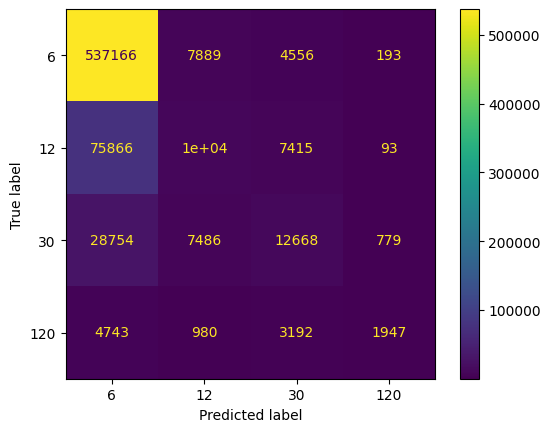

In [25]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_true=y_test,y_pred=test_predictions)